In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

data = pd.read_csv("M:/DataSet/usaccident/real/cleanData.csv",index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212697 entries, 0 to 212696
Columns: 624 entries, TMC to yorksmyrnakakh29743
dtypes: float64(10), int64(614)
memory usage: 1014.2 MB


1.可视化
=

<AxesSubplot:>

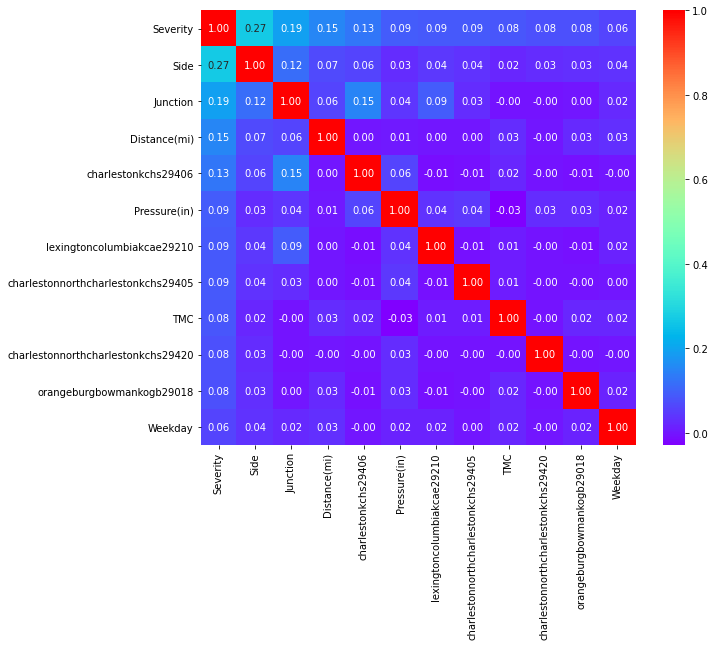

In [2]:
corrmat = data.corr()
plt.subplots(figsize=(10,8))
k = 12
cols = corrmat.nlargest(k,'Severity')['Severity'].index
cm = np.corrcoef(data[cols].values.T)
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f'
           ,annot_kws={"size":10},yticklabels=cols.values
           ,xticklabels=cols.values,cmap="rainbow")

2.数据集划分
=

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler

Y = data['Severity']
X = data.drop(["Severity"], axis=1)

X.shape, Y.shape

((212697, 623), (212697,))

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10, stratify=Y)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((170157, 623), (42540, 623), (170157,), (42540,))

3.特征选择
=

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf = clf.fit(X_train,Y_train)
np.count_nonzero(clf.feature_importances_)

619

In [6]:
selector = SelectFromModel(clf, prefit=True,threshold='median')
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)
X_train.shape, X_test.shape

((170157, 312), (42540, 312))

In [7]:
selectCols = np.array(np.where(selector.get_support() == True))
selectCols = selectCols.flatten()
selectCols.shape

(312,)

In [8]:
data = data.iloc[:,selectCols]
data.shape

(212697, 312)

In [9]:
data.to_csv("M:/DataSet/usaccident/real/selectData.csv")